In [10]:
# librerie
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy.cluster.hierarchy import dendrogram, linkage
#%matplotlib qt
###########################################################

SMALL_SIZE = 17
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y label
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#plt.rc('titlesize', titlesize=BIGGER_SIZE)  #fontsize of the figure title
###########################################################


# Hierarchical clustering
## 1. Preprocessing

In [2]:
# variables transformation
df = pd.read_csv('../data/df_formatted.csv')
df_num = df.drop(['Left','Department','Salary','Work_Accident','Promotion_Last_5_Years'],axis=1)

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

df_norm = pd.DataFrame(min_max_scaler.fit_transform(df_num.values.astype(float)))
df_norm.columns = df_num.columns
df_norm.head()

from sklearn.preprocessing import StandardScaler

df_z = StandardScaler().fit_transform(df_num.values)
df_z = pd.DataFrame(df_z)
df_z.columns = df_num.columns

# scelgo di usare lo standard scaler
data = df_z
data.head()
#df_num_norm = min_max_scaler.fit_transform(df_num.values.astype(float))


   Satisfaction_Level  Last_Evaluation  Average_Montly_Hours  \
0           -0.936495        -1.087275             -0.882040   
1            0.752814         0.840707              1.220423   
2           -2.022479         0.957554              1.420657   
3            0.431041         0.899131              0.439508   
4           -0.976716        -1.145699             -0.841993   

   Time_Spend_Company  Number_Projects  
0           -0.341235        -1.462863  
1            1.713436         0.971113  
2            0.343655         2.593763  
3            1.028546         0.971113  
4           -0.341235        -1.462863  

## Testing function for analysis

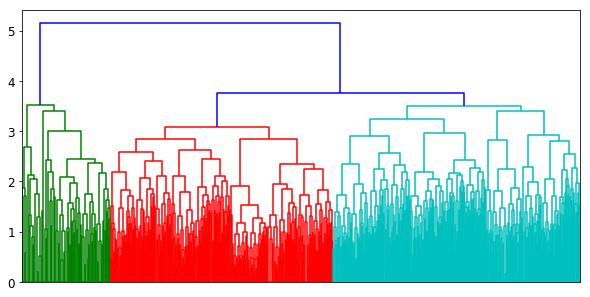

In [3]:
###########################################################
#from sklearn.cluster import AgglomerativeClustering
#from sklearn.neighbors import kneighbors_graph
# clustering with scipy
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, fcluster, cut_tree, inconsistent
import scipy.cluster.hierarchy as h
from sklearn.metrics import silhouette_score, silhouette_samples
import gc
methods = ['single','complete','average','weighted','centroid','median','ward']
distances = ['euclidean','cityblock','mahalanobis']

# testing function for analysis
###########################################################
method = methods[2]
distance = distances[0]

data_dist = pdist(data,metric = distance)
data_link = linkage(data_dist,method=method,metric=distance)

coph = cophenet(Z = data_link, Y = data_dist)
coph_corr=coph[0]

inconsistency = inconsistent(data_link,d=2)

prova = h.maxinconsts(data_link,inconsistency)

plt.hist(prova)

plt.close()

fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z=data_link,truncate_mode='level', p=10,
                orientation='top',
                #count_sort='ascendent',
                distance_sort=True,
                no_labels=True,show_leaf_counts=True,
)

#plt.title('Method: {} , Metric: {}, Coph Corr: {:.2f} '.format(method,distance,coph_corr))

#plt.savefig('../images/hierarchical/dendrogram_{}_{}.pdf'.format(method,distance))

out = [data_link,[method,distance,coph_corr,]]

# testing function finished
###########################################################


##  Function for hierarchical clustering

In [4]:
###########################################################
def analyze(method,distance):
    print('Running method {} with metric {}'.format(method,distance))
    data_dist = pdist(data,metric = distance)
    data_link = linkage(data_dist,method=method,metric=distance)

    coph = cophenet(Z = data_link, Y = data_dist)
    coph_corr=coph[0]
    
    plt.close()

    fig = plt.figure(figsize=(10, 5))
    dn = dendrogram(Z=data_link,p=5,truncate_mode='level',
                    orientation='left',count_sort='ascendent',
                    no_labels=False,show_leaf_counts=True,
    )

    plt.title('Method: {} , Metric: {}, Coph Corr: {:.2f} '.format(method,distance,coph_corr))

    plt.savefig('../images/hierarchical/standz_dendrogram_{}_{}.pdf'.format(method,distance))
     
    return [method,distance,coph_corr]

###########################################################


## Apply each method for each metric

Running method single with metric euclidean


Running method single with metric cityblock


Running method single with metric mahalanobis


Running method complete with metric euclidean


Running method complete with metric cityblock


Running method complete with metric mahalanobis


Running method average with metric euclidean


Running method average with metric cityblock


Running method average with metric mahalanobis


Running method weighted with metric euclidean


Running method weighted with metric cityblock


Running method weighted with metric mahalanobis


Running method centroid with metric euclidean


Running method centroid with metric cityblock


Running method centroid with metric mahalanobis


Running method median with metric euclidean


Running method median with metric cityblock


Running method median with metric mahalanobis


Running method ward with metric euclidean


Running method ward with metric cityblock


Running method ward with metric mahalanobis


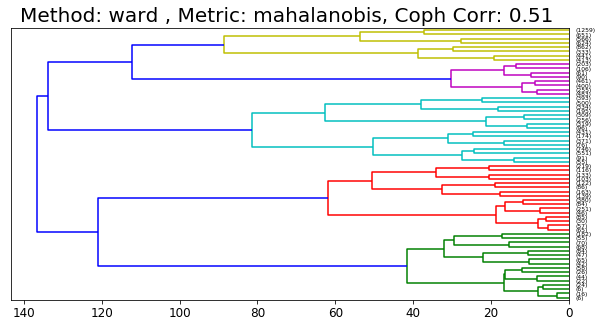

In [5]:
methods = ['single','complete','average','weighted','centroid','median','ward']

out = []        
for method in methods:
    for distance in distances:
        out.append(analyze(method,distance=distance))

###########################################################        
# which is the better method?
# Let's compare the cophenetic correlation

Dout =  pd.DataFrame(out)
Dout.columns = ['method','distance','coph_corr']
Dout = Dout.sort_values(by=['coph_corr','method','distance'],ascending=False)


## Comparison of cophenetic correlations

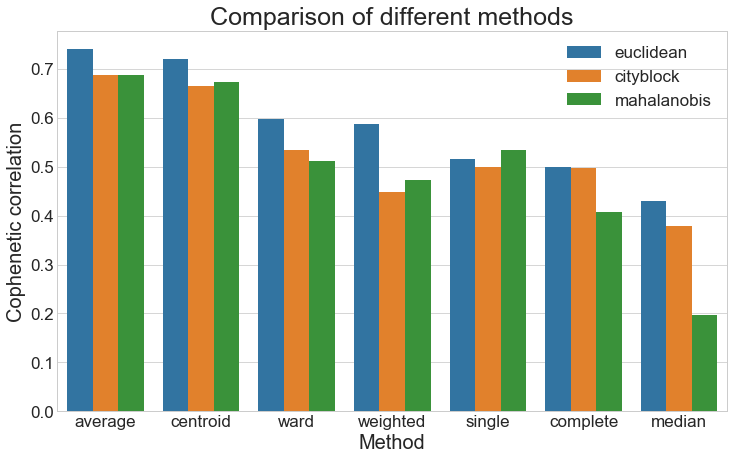

In [11]:
import seaborn as sb
plt.close()
#current_palette = sns.color_palette('deep')
#sns.palplot(current_palette)

# colors = ["windows blue", "amber", "faded green", "dusty purple"]
# sns.palplot(sns.xkcd_palette(colors))
# mypalette = sns.color_palette('husl',3)
# sns.palplot(mypalette)
# sns.set_palette(palette = 'huls',3)
# sb.xkcd_rgb.keys()

colors = ["olive yellow","windows blue", "orange red"]

#palette = sns.xkcd_palette(colors)
#sb.palplot(palette)
#sb.set_palette(palette)

sb.set_style('whitegrid')

plt.close()
plt.figure(figsize=(12,7))

sb.barplot(data=Dout, x='method',y='coph_corr',
           hue='distance')

plt.legend()
#plt.legend(bbox_to_anchor=(1, 1), borderaxespad=1.4)
#plt.tight_layout()
plt.xlabel('Method')
plt.ylabel('Cophenetic correlation')
plt.title('Comparison of different methods')
#plt.tight_layout(pad=1)

plt.savefig('../images/hierarchical/methods_comparison.pdf')
#plt.close()

#from ggplot import *
#ggplot(aes(weight='coph_corr',x='method'),data=Dout)+geom_bar(stat='identity')


## Testing inconsistency

## Inconsistency

In [181]:
selected_methods = ['centroid','average']
method = selected_methods[1]
distance = distances[0]
data_dist = pdist(data,metric = distance)
data_link = linkage(data_dist,method=method,metric=distance)


In [182]:
#print data_link

R= h.inconsistent(data_link,d=2)
h.maxinconsts(Z=data_link,R=R)
Dinconsistent = pd.DataFrame(R)
Dinconsistent.columns = ('mean','sd','Nlinks','Inconsistency')
Dinconsistent.head()
Dinconsistent=Dinconsistent.sort_values(by=['mean','Inconsistency'],ascending=False)
Dinconsistent=Dinconsistent.sort_index(ascending=False)
#help(Dinconsistent.sort_values)

Dlink = pd.DataFrame(data_link)
Dlink.columns=('cluster1','cluster2','distance','counts')
Dlink=Dlink.sort_values('distance',ascending=False)
#
#Nclusters = np.arange(max(Dlink.index),-1,-1)
Nclusters = np.arange(2,(max(Dlink.index)+3))
Dlink['Nclusters'] = Nclusters
Dlink.head(10)

       cluster1  cluster2  distance   counts  Nclusters
14997   29994.0   29995.0  5.155751  14999.0          2
14996   29989.0   29993.0  3.760918  14757.0          3
14995   29980.0   29992.0  3.516746    242.0          4
14994   29990.0   29991.0  3.503427  12780.0          5
14993   29745.0   29988.0  3.396751    212.0          6
14992   29982.0   29986.0  3.395617    519.0          7
14991   29985.0   29987.0  3.235917  12261.0          8
14990   29983.0   29984.0  3.092529   1977.0          9
14989   29973.0   29975.0  3.002871    208.0         10
14988   29957.0   29972.0  2.955351  10877.0         11

In [183]:
Dinconsistent.head()
#4.4188-3.2057

           mean        sd  Nlinks  Inconsistency
14997  4.144472  0.884262     3.0       1.143642
14996  3.452291  0.337116     3.0       0.915491
14995  3.198625  0.451091     3.0       0.705226
14994  3.378320  0.134591     3.0       0.929529
14993  2.600261  1.056961     3.0       0.753566

In [184]:
Dmerged = pd.merge(Dlink,Dinconsistent,on=None,left_index=True,right_index=True)
Dmerged.head()
Dmerged = Dmerged.drop(['cluster1','cluster2'],axis=1)
Dmerged.head()

       distance   counts  Nclusters      mean        sd  Nlinks  Inconsistency
14997  5.155751  14999.0          2  4.144472  0.884262     3.0       1.143642
14996  3.760918  14757.0          3  3.452291  0.337116     3.0       0.915491
14995  3.516746    242.0          4  3.198625  0.451091     3.0       0.705226
14994  3.503427  12780.0          5  3.378320  0.134591     3.0       0.929529
14993  3.396751    212.0          6  2.600261  1.056961     3.0       0.753566

In [185]:
Dmerged_filtered = Dmerged.query('Nclusters<15')
Dmerged_filtered.head(30)

       distance   counts  Nclusters      mean        sd  Nlinks  Inconsistency
14997  5.155751  14999.0          2  4.144472  0.884262     3.0       1.143642
14996  3.760918  14757.0          3  3.452291  0.337116     3.0       0.915491
14995  3.516746    242.0          4  3.198625  0.451091     3.0       0.705226
14994  3.503427  12780.0          5  3.378320  0.134591     3.0       0.929529
14993  3.396751    212.0          6  2.600261  1.056961     3.0       0.753566
14992  3.395617    519.0          7  3.043752  0.308391     3.0       1.140972
14991  3.235917  12261.0          8  3.031817  0.178598     3.0       1.142791
14990  3.092529   1977.0          9  2.923990  0.146022     3.0       1.154200
14989  3.002871    208.0         10  2.624932  0.327332     3.0       1.154607
14988  2.955351  10877.0         11  2.521861  0.393431     3.0       1.101819
14987  2.915232    437.0         12  2.669610  0.329305     3.0       0.745879
14986  2.904182   1384.0         13  2.606111  0.278

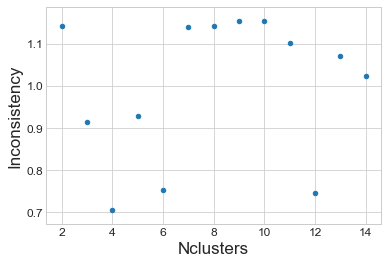

In [186]:
plt.figure(figsize=(10,5))
Dmerged_filtered.plot.scatter(x='Nclusters',y='Inconsistency')

In [187]:
method


'average'

Plot of the best dendrogram

In [7]:
###########################################################
selected_methods = ['centroid','average']
#method =selected_methods[0]
distances = ['euclidean']

for method in selected_methods:
    for distance in distances:

        data_dist = pdist(data,metric = distance)
        data_link = linkage(data_dist,method=method,metric=distance)


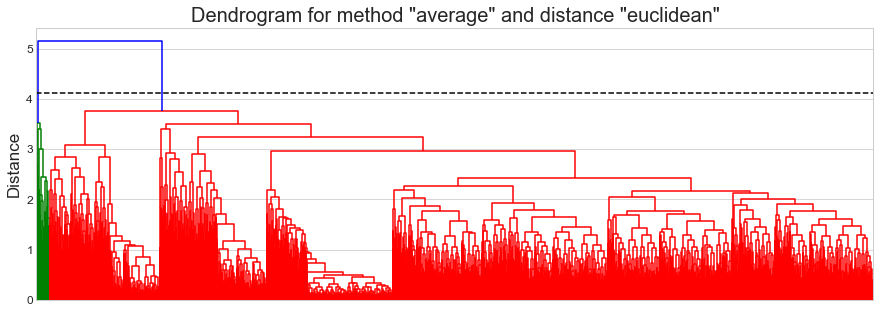

In [9]:

###########################################################
selected_methods = ['centroid','average']
#method =selected_methods[0]
distances = ['euclidean']

for method in selected_methods:
    for distance in distances:

        data_dist = pdist(data,metric = distance)
        data_link = linkage(data_dist,method=method,metric=distance)
        
        ##coph = cophenet(Z = data_link, Y = data_dist)
        ##coph_corr=coph[0]
        #coph_corr

        ##inconsistency = inconsistent(data_link,d=2)
        ##prova = h.maxinconsts(data_link,inconsistency)
        #plt.hist(prova)

        cut_level = max(data_link[:,2])*0.8

        plt.close()
        fig = plt.figure(figsize=(15, 5))
        dn = dendrogram(Z=data_link,##truncate_mode='level', p=20,
                        orientation='top',
                        count_sort='ascending',
         ##              distance_sort='descending',
                        no_labels=True,show_leaf_counts=True,
                        color_threshold = cut_level
        )
        plt.axhline(y=cut_level,linestyle='--',
                    color='black')
        ## plt.xlim(0,160000)
        plt.title('Dendrogram for method "{}" and distance "{}"'.format(method,distance))
        plt.ylabel("Distance")
        #plt.xlabel("")

        plt.savefig('../images/hierarchical/complete_dendrogram_{}_{}.pdf'.format(method,distance))

        
